In [1]:
#import modules
import numpy as np
import csv
from scipy import special
import matplotlib.pyplot as plt

In [2]:
#helper function to read file
def readFile(fileName):
    with open(fileName) as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    return d


In [3]:
file = readFile("DS.txt")
data = file
b = data[0]

r = np.zeros((len(b)-1,1))
for i in range(len(b)-1):
    den = float(b[i])
    num = float(b[i+1])
    r[i] = np.log(num/den)

#Aggregation of returns   

tau = 7;            #Number of days for aggregation of returns 
flag = 0;           #Flag variable activates if to generate average returns on tau days
if flag == 1:
    aux = []; 
    for t in range(0,len(r)-1-tau,tau):
        s = sum(r[i] for i in range(t+1,t+tau))
        aux = np.concatenate((aux,s),axis=0)   
    r = aux;



In [8]:
#Calculating moments

N = len(r);                      # Number of log-returns
m = np.sum(r)/N;                 #Compute mean and store value in variable
s = np.sqrt(np.sum((r-m)**2)/N); #Compute std. deviation and store value in variable
sk = np.sum((r-m)**3)/(N*(s**3))
Ek = np.sum((r-m)**4)/(N*(s**4))-3

print('\n')
print('Mean = ',m)
print('Std. deviation = ',s)
print('Skewness = ', sk)
print('Excess kurtosis = ',Ek)
print('\n')




Mean =  0.0039961257177634196
Std. deviation =  0.041031528620959316
Skewness =  -0.27972693402031196
Excess kurtosis =  5.338455570833892




Text(0, 0.5, '$C(r)$')

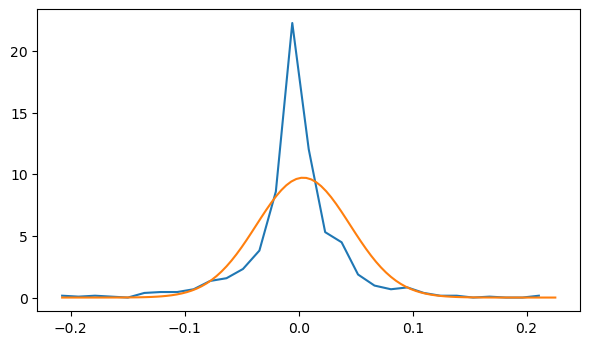

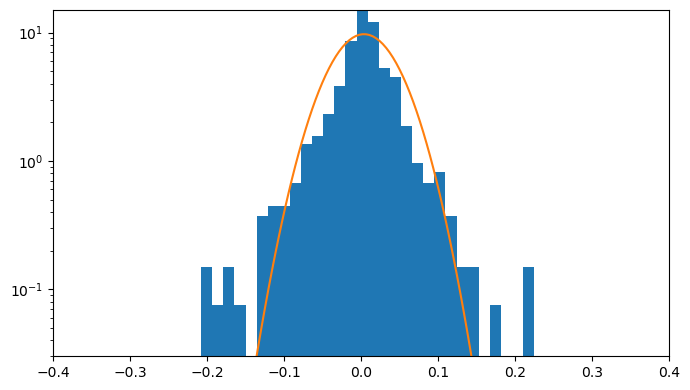

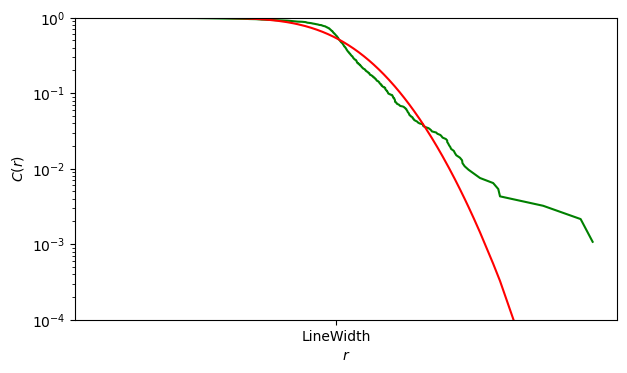

In [13]:
x = np.linspace(min(r),max(r),100) # Point grid between min and max return
g = np.exp(-(x-m)**2/(2*(s**2)))/np.sqrt(2*np.pi*(s**2)) # Gaussian PDF values computed on point grid

NB = 30; # Number of bins for histogram of returns

h,xr = np.histogram(r,NB, density = True);

plot0 = plt.figure(0,figsize=(7,4), dpi=100)
plt.plot(xr[:-1],h)
plt.plot(x,g)

#Comparing log returns to a log distribution
plot1 = plt.figure(1,figsize=(7,4), dpi=100)
plt.hist(r,bins =NB,density=True,stacked=True) #using matplotlib hist [no supimos como hacer barras con histogram]
plt.plot(x,g)
plt.yscale('log')
plt.xlim(-0.4,0.4)
plt.ylim(0.03,15)
plt.tight_layout()

x = np.sort(r,axis=None); # Returns sorted in ascending order
y = np.arange(1,len(r)+1,1)
y = 1 - y/(len(r)+1); # Calculating CCDF as rank-frequency plot
c = 0.5*(1 - special.erf((x-m)/(s*np.sqrt(2)))) # Gaussian CCDF

plot2 = plt.figure(2,figsize=(7,4), dpi=100)
plt.plot(x,y,'g','LineWidth',2)
plt.plot(x,c,'r','LineWidth',2)
plt.yscale('log')
plt.ylim([1e-4,1])
plt.xlabel('$r$')
plt.ylabel('$C(r)$')

alpha right =  [2.2072529]
[1.02023003]


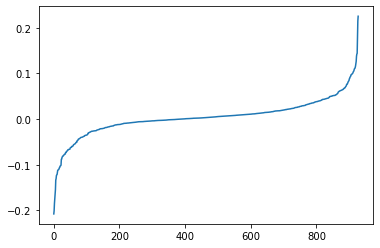

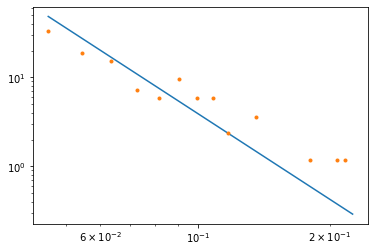

In [47]:
#RIGHT TAIL Fit
p = 0.1; #Defining top % of tails
sr = np.sort(r, axis = 0) #Sorted log-returns
plt.plot(sr)
index = int(np.round((1-p)*len(sr)))-1 #get the rounded index of the first value of right tail(10%)
#[-1 because in python index starts at 0]
right_tail = sr[index:,:] #from row index to end of rows,  and all columns

T = len(right_tail);
rmin = right_tail[0]
suma = 0

for j in range(T):
    suma = suma + np.log((right_tail[j]/rmin))
alpha = T/suma #Maximum Likelihood alpha for right tail
print("alpha right = ",alpha)

#PDF of right tail
nbins = 20
h2,x2 = np.histogram(right_tail,nbins,density =True) #Normalized histogram

f = (alpha/rmin)*((right_tail/rmin)**(-(alpha+1))) #y values of power law distribution
plt.figure(5)
#No se porque el profe hizo una xgrid
plt.plot(right_tail,f)
plt.plot(x2[:-1],h2,".")
plt.yscale('log')
plt.xscale('log')

sum = 0; #Just checking that it is normalized
for k in range(len(right_tail)-1):
    sum = sum+(f[k]*(right_tail[k+1]-right_tail[k]))  
print(sum)

alpha left =  [1.62557578]


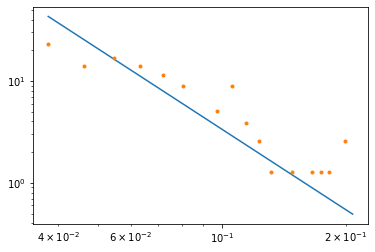

In [49]:
#LEFT TAIL

#Calculating alpha for Left Tail
index_left = int(np.round((p*len(sr)))-1)
left_tail = np.abs(sr[:index_left,:])

T = len(left_tail)
rmin = left_tail[index_left-1]
suma = 0

for m in range(T):
    suma = suma + np.log((left_tail[m]/rmin))
alpha_left = T/suma #Maximum Likelihood alpha for right tail
print("alpha left = ",alpha_left) #checar que varia como un 3% del de MATLAB

#PDF of left tail
nbins = 20
h3,x3 = np.histogram(left_tail,nbins,density =True) #Normalized histogram

f2 = (alpha_left/rmin)*((left_tail/rmin)**(-(alpha_left+1))) #y values of power law distribution
plt.figure(6)
#No se porque el profe hizo una xgrid
plt.plot(left_tail,f2)
plt.plot(x3[:-1],h3,".")
plt.yscale('log')
plt.xscale('log')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88110de550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88110dec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88110de1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8812232310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8812232610>],
 'means': []}

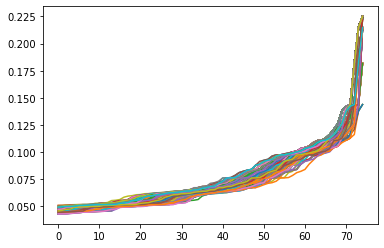

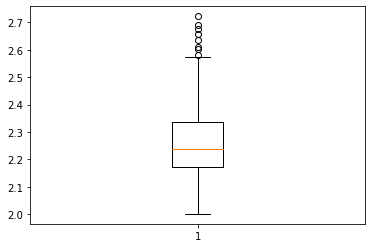

In [31]:
#BOOTSTRAP
bts = 0.8; # Fraction of data to be retained in each bootstrap sample
Nbts = 500; # Number of bootstrap samples
alpha = 0.9; # Significance level PARA QUE SE USOOOOOOOOOOOOOOOOOOOOOOOOO??????????????

#Right Tail with bootstrap
alpha_right_bts = np.zeros([Nbts,1]); # Vector to collect bootstrap estimates for right tail exponent

for i in range(Nbts):
    r_bts = r[np.random.permutation(len(r))] # Random permutation of returns (literal randomiza el orden de returns)
    #<<<<<<<<  *   >>>>>>>>>> lo de arriba funciona porque
    indice = int(np.round(bts*len(r_bts))) #Index at 80% value
    r_bts = r_bts[:indice,:]
    r_bts = np.sort(r_bts, axis = 0)
    indice2 = int(np.round((1-p)*len(r_bts)))-1 #index to take top p% returns
    right_tail_bts = r_bts[indice2:,:]
    plt.plot(right_tail_bts)

    N_bts = len(right_tail_bts); # Number of bootstrapped returns
    suma = 0
    for v in range(N_bts):
        suma = suma + np.log((right_tail_bts[v]/min(right_tail_bts)))
    alpha_right_bts[i] = N_bts/suma

alpha_right_bts = np.sort(alpha_right_bts, axis = 0)

plt.figure(5)
plt.boxplot(alpha_right_bts)
#<<<<<<<<  *   >>>>>>>>>>
#a = np.array([7, 6, 5, 4 ,3 ])
#b = a[np.array([4, 3, 2, 1 ,0 ])]
#print(b)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8810a71400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8810a6ad60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8810a71eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8810a6a760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8810a7edc0>],
 'means': []}

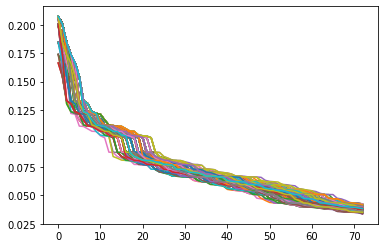

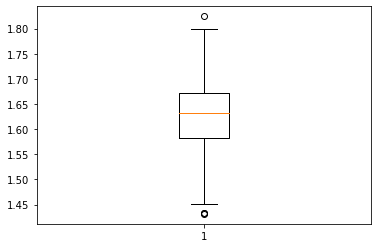

In [29]:
#Left Tail with bootstrap
alpha_left_bts = np.zeros([Nbts,1]); # Vector to collect bootstrap estimates for left tail exponent

for i in range(Nbts):
    r_bts = r[np.random.permutation(len(r))] # Random permutation of returns (literal randomiza el orden de returns)
    #<<<<<<<<  *   >>>>>>>>>> lo de arriba funciona porque
    indice = int(np.round(bts*len(r_bts))) #Index at 80% value
    r_bts = r_bts[:indice,:]
    r_bts = np.sort(r_bts, axis = 0)
    indice2 = int(np.round(p*len(r_bts)))-1 #index to take top p% returns
    left_tail_bts = np.absolute(r_bts[:indice2,:])
    plt.plot(left_tail_bts)

    N_bts = len(left_tail_bts); # Number of bootstrapped returns
    suma = 0
    for v in range(N_bts):
        suma = suma + np.log((left_tail_bts[v]/min(left_tail_bts)))
    alpha_left_bts[i] = N_bts/suma

alpha_left_bts = np.sort(alpha_left_bts, axis = 0)

plt.figure(6)
plt.boxplot(alpha_left_bts)